# Health Care Dataset - INM701 Coursework
Postgraduate students: 
- Tamila Skakova
- Elbaraa Elalami

## Content:
- **[Part 1](#part1)- Importing the data set, packages used**
- **[Part 2](#part2)- Exploratory data analysis**
- [Part 2.1](#part2.1)- Analysis of the features
- [Part 2.2](#part2.2)- Analysis of the Target
- [Part 2.3](#part2.3)- Statistical analysis of the dataset
- **[Part 3](#part3) -  Preparing our data**
- [Part 3.1](#part3.1) -  Missing Values
- [Part 3.2](#part3.2) -  Enconding, Shuffling, Scaling
- [Part 3.3](#part3.3) -  Multicollinearity
- [Part 3.4](#part3.4) -  SMOTE Analysis
- **[Part 4/1](#part4/1) -  Models**
- [Part 4.1.1](#part4.1.1) -  Score method
- [Part 4.1.2](#part4.1.2) -  KNN
- [Part 4.1.3](#part4.1.3) -  Decision tree model
- [Part 4.1.4](#part4.1.4) -  Random Forest
- [Part 4.1.5](#part4.1.5) -  Naive Bayes
- [Part 4.1.6](#part4.1.6) -  ANN
- **[Part 4/2](#part4/2) -  Models with SMOTE**
- [Part 4.2.1](#part4.2.1) -  KNN
- [Part 4.2.2](#part4.2.2) -  Decision tree model 
- [Part 4.2.3](#part4.2.3) -  Random Forest
- [Part 4.2.4](#part4.2.4) -  Naive Bayes
- [Part 4.2.5](#part4.2.5) -  ANN
- **[Part 5](#part5) -  Additional Models**
- [Part 5.1](#part5.1) -  Gradient Boost Classifier
- [Part 5.2](#part5.2) -  CatBoost Classifier
- [Part 5.2](#part5.2) -  XGB BOOST Classifier

## Description of features in the dataframe:

- `Column`	Description
- `case_id`	Case_ID registered in Hospital
- `Hospital_code`	Unique code for the Hospital
- `Hospital_type_code`	Unique code for the type of Hospital
- `City_Code_Hospital` City Code of the Hospital
- `Hospital_region_code`	Region Code of the Hospital
- `Available Extra Rooms in Hospital`	Number of Extra rooms available in the Hospital
- `Department`	Department overlooking the case
- `Ward_Type`	Code for the Ward type
- `Ward_Facility_Code`	Code for the Ward Facility
- `Bed Grade`	Condition of Bed in the Ward
- `patientid`	Unique Patient Id
- `City_Code_Patient`	City Code for the patient
- `Type of Admission`	Admission Type registered by the Hospital
- `Severity of Illness`	Severity of the illness recorded at the time of admission
- `Visitors with Patient`	Number of Visitors with the patient
- `Age`	Age of the patient
- `Admission_Deposit`	Deposit at the Admission Time
- `Stay`	Stay Days by the patient, the length of stay - 11 different classes ranging from 0-10 days to more than 100 days.


[Back to top](#Content:)


<a id='part1'></a>

## Part 1 -  Importing the data set, packages used

In [1]:
import os
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import io
import requests
%matplotlib inline

In [2]:
path = "healthcare"

filename_read = os.path.join(path, "train_data.csv")
health_care = pd.read_csv(filename_read, na_values=['NA', '?'])

# print(health_care.shape)
# print(health_care.columns)

In [3]:
health_care.head(10)

case_id  Hospital_code Hospital_type_code  City_Code_Hospital  \
0        1              8                  c                   3   
1        2              2                  c                   5   
2        3             10                  e                   1   
3        4             26                  b                   2   
4        5             26                  b                   2   
5        6             23                  a                   6   
6        7             32                  f                   9   
7        8             23                  a                   6   
8        9              1                  d                  10   
9       10             10                  e                   1   

  Hospital_region_code  Available Extra Rooms in Hospital    Department  \
0                    Z                                  3  radiotherapy   
1                    Z                                  2  radiotherapy   
2                    X                                  2    anesthesia   
3                    Y                                  2  radiotherapy   
4                    Y                                  2  radiotherapy   
5                    X                                  2    anesthesia   
6                    Y                                  1  radiotherapy   
7                    X                                  4  radiotherapy   
8                    Y                                  2    gynecology   
9                    X                                  2    gynecology   

  Ward_Type Ward_Facility_Code  Bed Grade  patientid  City_Code_Patient  \
0         R                  F        2.0      31397                7.0   
1         S                  F        2.0      31397                7.0   
2         S                  E        2.0      31397                7.0   
3         R                  D        2.0      31397                7.0   
4         S                  D        2.0      31397                7.0   
5         S                  F        2.0      31397                7.0   
6         S                  B        3.0      31397                7.0   
7         Q                  F        3.0      31397                7.0   
8         R                  B        4.0      31397                7.0   
9         S                  E        3.0      31397                7.0   

  Type of Admission Severity of Illness  Visitors with Patient    Age  \
0         Emergency             Extreme                      2  51-60   
1            Trauma             Extreme                      2  51-60   
2            Trauma             Extreme                      2  51-60   
3            Trauma             Extreme                      2  51-60   
4            Trauma             Extreme                      2  51-60   
5            Trauma             Extreme                      2  51-60   
6         Emergency             Extreme                      2  51-60   
7            Trauma             Extreme                      2  51-60   
8            Trauma             Extreme                      2  51-60   
9            Trauma             Extreme                      2  51-60   

   Admission_Deposit   Stay  
0             4911.0   0-10  
1             5954.0  41-50  
2             4745.0  31-40  
3             7272.0  41-50  
4             5558.0  41-50  
5             4449.0  11-20  
6             6167.0   0-10  
7             5571.0  41-50  
8             7223.0  51-60  
9             6056.0  31-40

[Back to top](#Content:)

<a id='part2'></a>
## Part 2- Exploratory data analysis (EDA)

[Back to top](#Content:)

<a id='part2.1'></a>
### Analysis of the features

In [4]:
#sorting by Stay for better representation in the visualisations
health_care = health_care.sort_values(by = "Stay", ascending = True)
# To make sure we consider all the correct features to make an accurate prediction, it may be useful to create some plots to have a better understanding of our data and relationship between them and the output feature. For that we have used Python data visualisation library seaborn. We begin by visualising the length of stays by age of patients admitted to hospitals, type of admissions, severity of illness, available extra rooms in hospitals,  etc., by using a countplot(), that shows the counts of observations in each categorical bin using bars.

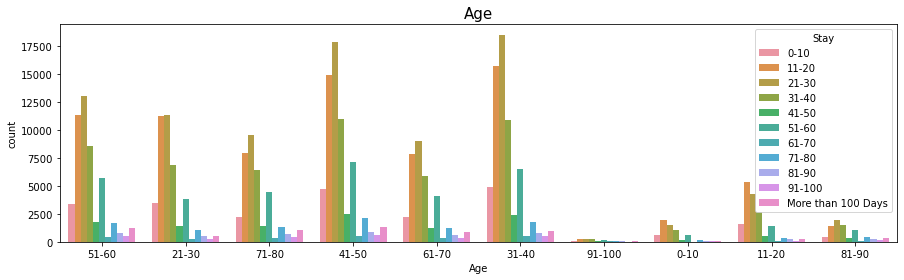

In [5]:
#plot size
plt.figure(figsize = (15,4))
#plot title
plt.title("Age", fontdict = {'fontsize':15})
ax = sns.countplot(x = "Age", hue = 'Stay', data = health_care)

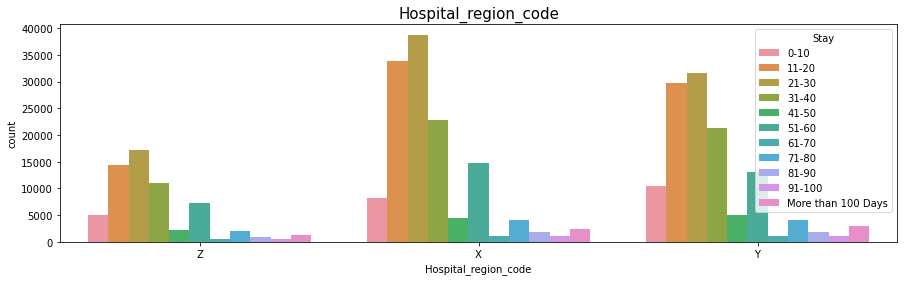

In [6]:
#plot size
plt.figure(figsize = (15,4))
#plot title
plt.title("Hospital_region_code", fontdict = {'fontsize':15})
ax = sns.countplot(x = "Hospital_region_code", hue = 'Stay', data = health_care)

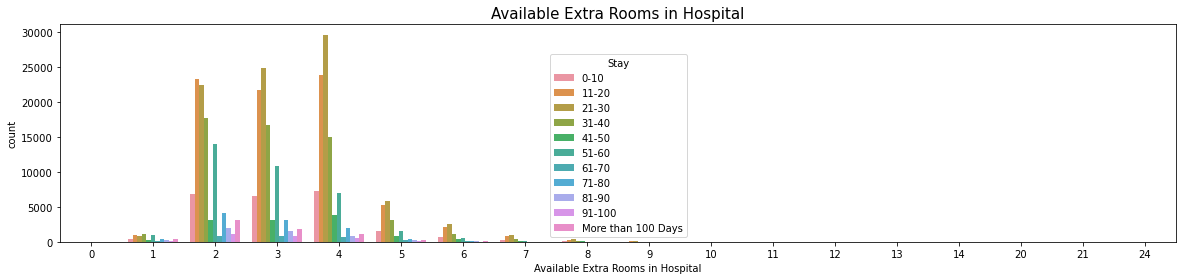

In [7]:
#plot size
plt.figure(figsize = (20,4))
#plot title
plt.title("Available Extra Rooms in Hospital", fontdict = {'fontsize':15})
ax = sns.countplot(x = "Available Extra Rooms in Hospital", hue = 'Stay', data = health_care)

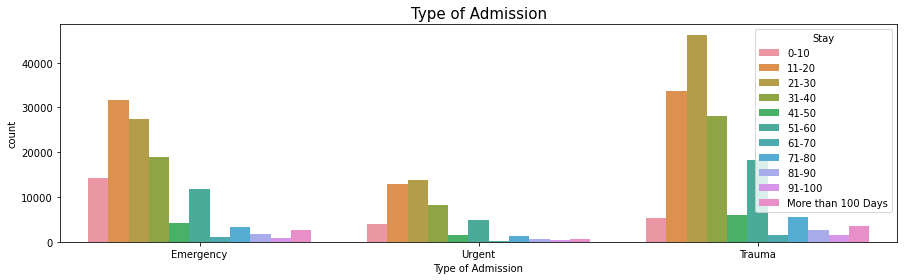

In [8]:
#plot size
plt.figure(figsize = (15,4))
#plot title
plt.title("Type of Admission", fontdict = {'fontsize': 15})
ax = sns.countplot(x = "Type of Admission", hue = 'Stay', data = health_care)


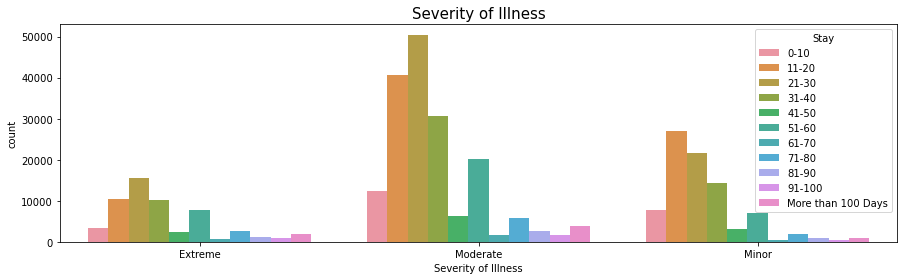

In [9]:
#plot size
plt.figure(figsize = (15,4))
#plot title
plt.title("Severity of Illness", fontdict = {'fontsize':15})
ax = sns.countplot(x = "Severity of Illness", hue = 'Stay', data = health_care)

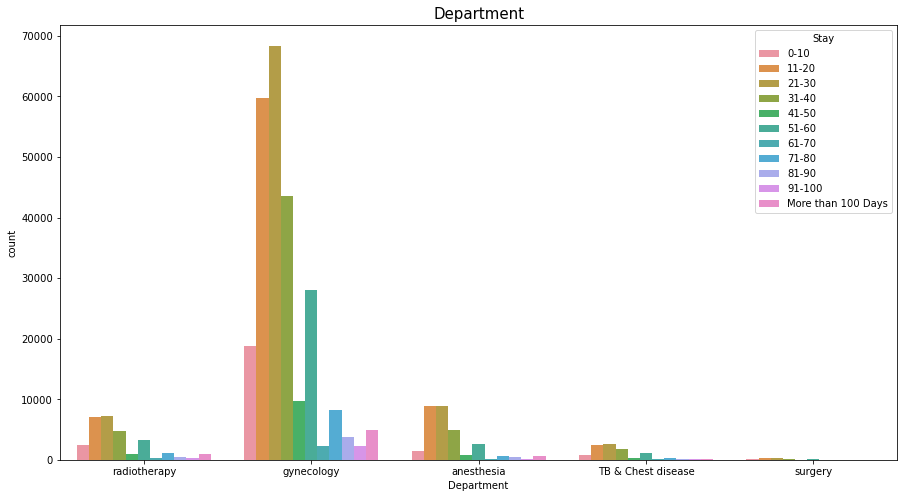

In [10]:
#plot size
plt.figure(figsize = (15,8))
#plot title
plt.title("Department", fontdict = {'fontsize':15})
ax = sns.countplot(x = "Department", hue = 'Stay', data = health_care)

[Back to top](#Content:)

<a id='part2.2'></a>
### Analysis of the Target

In [11]:
## Checking target
#creating a copy of df to have an original for further manipulation
health_care_copy = health_care.copy()

In [12]:
#number of unique element for each feature
encoder = LabelEncoder()
health_care_copy['Stay_cat'] = encoder.fit_transform(health_care_copy['Stay'])
n = len(health_care_copy['Stay_cat'])
l = []
for i in range(len(np.unique(health_care_copy['Stay_cat']))):
    k = len(health_care[health_care_copy['Stay_cat']==i])
    #print(f'N {10*i} and {10*(i+1)} is : {k}')
    print(f'{i}- {k}  : {100*k/n:.2f}%')

0- 23604  : 7.41%
1- 78139  : 24.54%
2- 87491  : 27.48%
3- 55159  : 17.32%
4- 11743  : 3.69%
5- 35018  : 11.00%
6- 2744  : 0.86%
7- 10254  : 3.22%
8- 4838  : 1.52%
9- 2765  : 0.87%
10- 6683  : 2.10%


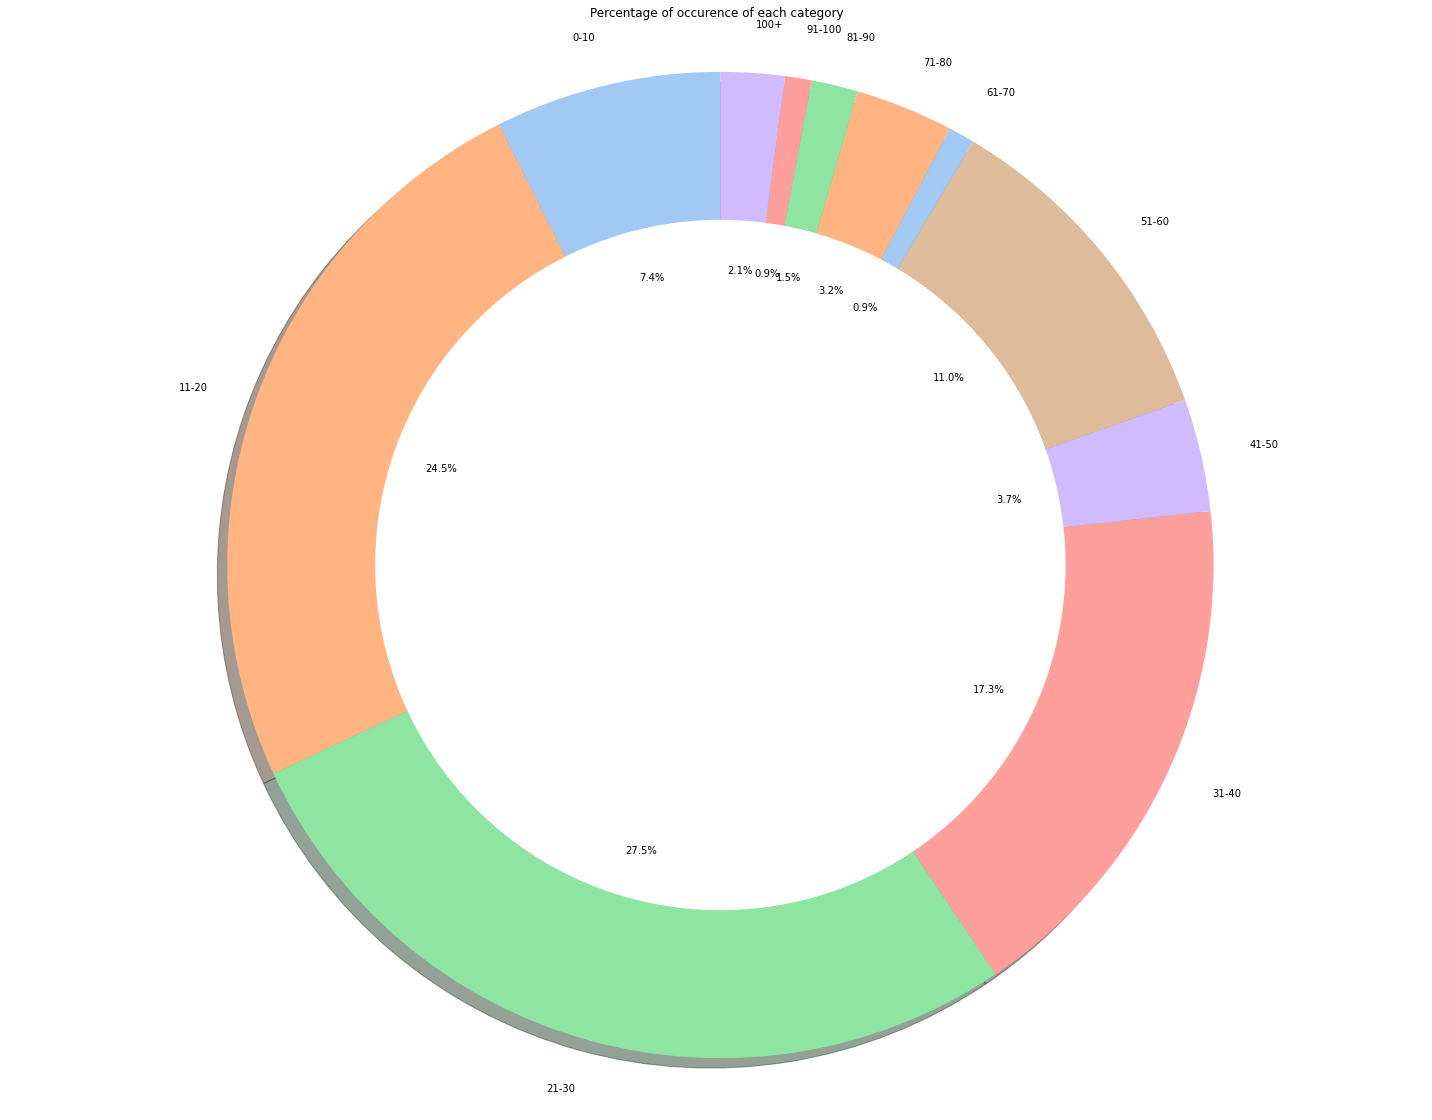

In [13]:
#Visualisation of Target categories
fig, ax1 = plt.subplots()
labels = np.unique(health_care['Stay'])
labels[-1] = '100+'

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:6]
plt.pie(health_care.groupby('Stay').size(), labels = labels,colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
fig.set_size_inches(20, 15.5)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.title('Percentage of occurence of each category')
plt.show()

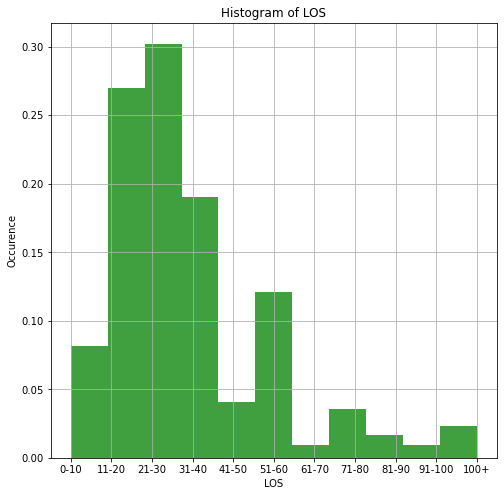

In [14]:
#Histogram plot
h = health_care['Stay'].sort_values()
h[h=='More than 100 Days'] = '100+'
plt.figure(figsize = (8,8))
plt.hist(h, bins=11, label=labels, density=True, facecolor='g', alpha=0.75)

plt.xlabel('LOS')
plt.ylabel('Occurence')
plt.title('Histogram of LOS')

plt.grid(True)
plt.show()

[Back to top](#Content:)

<a id='part2.3'></a>
### Statistical analysis of the dataset

In [15]:
#statistical analysis of each feature
df_copy = health_care.copy()
df_copy = df_copy.select_dtypes(include=["int","float"])
headers = list(df_copy.columns.values)
fields = []
for field in headers:
    fields.append({
        "name":field,
        "mean":health_care[field].mean(),
        "var":health_care[field].var(),
        "sdev":health_care[field].std()
    })
for field in fields:
    print(field)

{'name': 'case_id', 'mean': 159219.5, 'var': 8450256523.45631, 'sdev': 91925.27684731937}
{'name': 'Hospital_code', 'mean': 18.318840716246175, 'var': 74.54172342795815, 'sdev': 8.633754885793211}
{'name': 'City_Code_Hospital', 'mean': 4.771716943329627, 'var': 9.625725626972837, 'sdev': 3.10253535466928}
{'name': 'Available Extra Rooms in Hospital', 'mean': 3.1976271676119055, 'var': 1.3646244848651312, 'sdev': 1.1681714278585704}
{'name': 'Bed Grade', 'mean': 2.625806958297338, 'var': 0.7623835960744886, 'sdev': 0.8731458045907846}
{'name': 'patientid', 'mean': 65747.57947229916, 'var': 1442475571.9882042, 'sdev': 37979.93644002323}
{'name': 'City_Code_Patient', 'mean': 7.251858836721821, 'var': 22.51754524576123, 'sdev': 4.745265561142098}
{'name': 'Visitors with Patient', 'mean': 3.2840992595104854, 'var': 3.11191258613169, 'sdev': 1.764061389558677}
{'name': 'Admission_Deposit', 'mean': 4880.749392346391, 'var': 1181082.6254792996, 'sdev': 1086.776253641613}


In [16]:
## functions to feed to barplot
def mean(x):
    return np.mean(x)

def median(x):
    return np.median(x)

def std(x):
    return np.std(x)

In [17]:
## Encoding data
df_copy2 = health_care.copy()
target = df_copy2['Stay']
target_enc = encoder.fit_transform(target)

In [18]:
## Estimate of length of stay
target_estimate = 10* (target_enc) + 5
# Adding the estimate to the dataframe
df_copy2['Stay Estimate'] = target_estimate

In [19]:
## Using only Features with limited classes for the plot
elements_to_remove = ['case_id', 'patientid', 'Admission_Deposit', 'Stay', 'Stay Estimate']
column_features = [ column for column in df_copy.columns if column not in elements_to_remove]
print(column_features)

['Hospital_code', 'City_Code_Hospital', 'Available Extra Rooms in Hospital', 'Bed Grade', 'City_Code_Patient', 'Visitors with Patient']


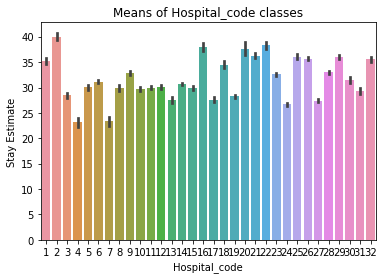

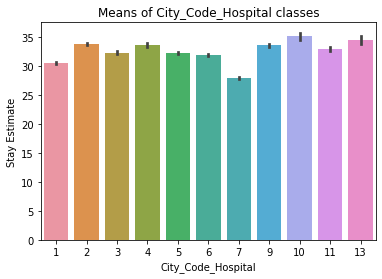

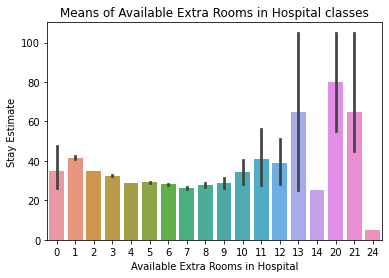

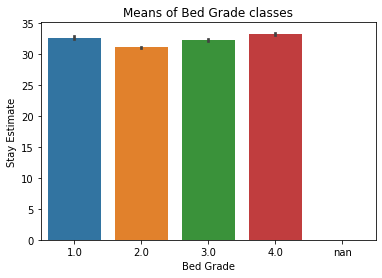

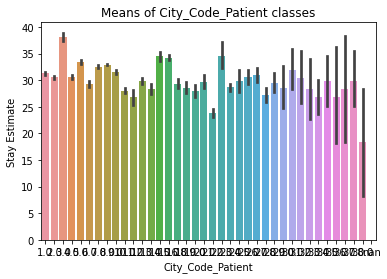

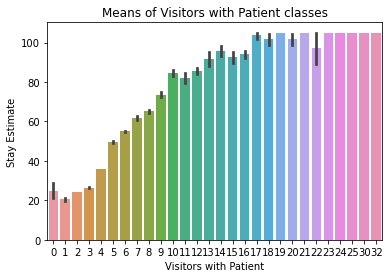

In [20]:
# Mean Analysis
#We study the relationship between the mean of stay and each feature
for feature in column_features :
    order = pd.unique(df_copy2[feature])
    order.sort()
    ax = sns.barplot(x=feature, y="Stay Estimate", data=df_copy2,order=order, estimator=mean)
    ax.set_title(f'Means of {feature} classes') 
    plt.show();

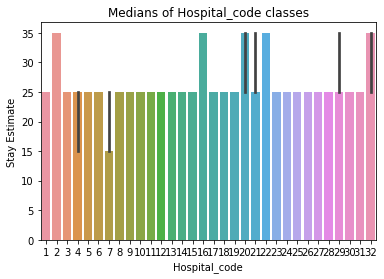

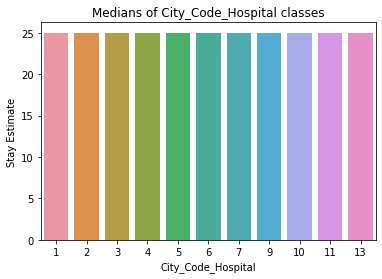

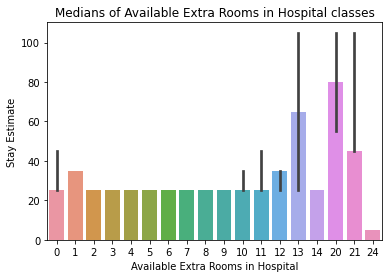

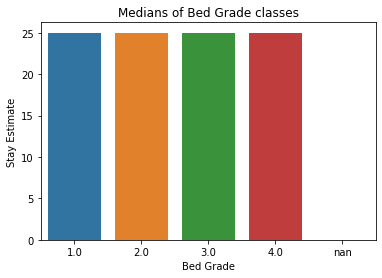

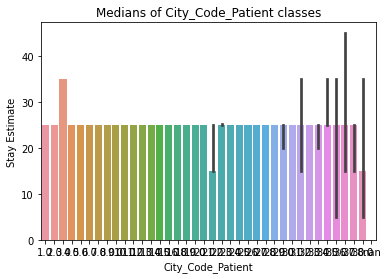

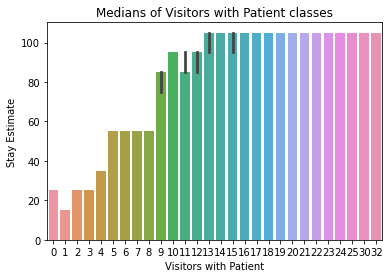

In [21]:
#Median Analysis
for feature in column_features :
    order = pd.unique(df_copy2[feature])
    order.sort()
    ax = sns.barplot(x=feature, y="Stay Estimate", data=df_copy2,order=order, estimator=median)
    ax.set_title(f'Medians of {feature} classes') 
    plt.show();

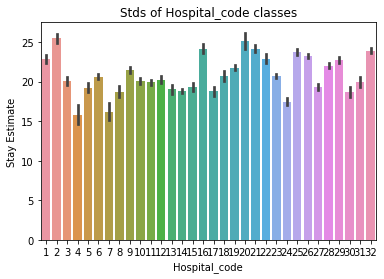

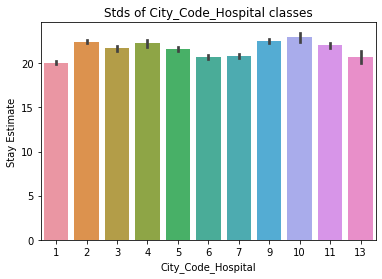

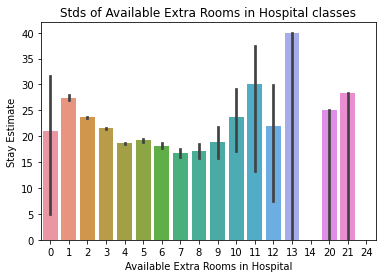

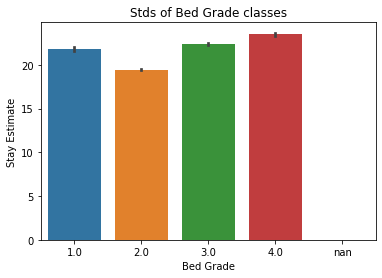

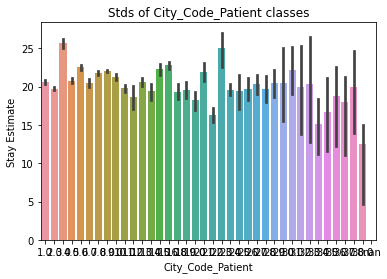

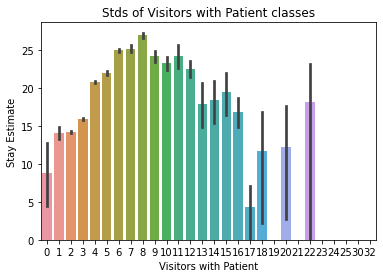

In [22]:
#Analysis of Std
for feature in column_features :
    order = pd.unique(df_copy2[feature])
    order.sort()
    ax = sns.barplot(x=feature, y="Stay Estimate", data=df_copy2,order=order, estimator=std)
    ax.set_title(f'Stds of {feature} classes') 
    plt.show();

[Back to top](#Content:)

<a id='part3'></a>
## Part 3 - Preparing our data

[Back to top](#Content:)

<a id='part3.1'></a>
### Missing Values

In [23]:
#checking for missing values
health_care.isnull().values.any()

True

In [24]:
#Checking number of NANs for each column, in order to understand how many missing values there are in a dataframe.
print("# of NaN in each columns:", health_care.isnull().sum(), sep='\n')

# of NaN in each columns:
case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                             113
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64


In [25]:
#calculates percentage of missing values in the specific feature
def perc_mv(x, y):
    perc = y.isnull().sum() / len(x) * 100
    return perc

In [26]:
print('Missing value ratios:\nBed Grade: {}\nCity_Code_Patient: {}'.format(
    perc_mv(health_care, health_care['Bed Grade']),
    perc_mv(health_care, health_care['City_Code_Patient'])))

Missing value ratios:
Bed Grade: 0.035485714644609
City_Code_Patient: 1.4231969802598936


In [27]:
#In the code cell below, we use the attribute dtype on df to retrieve the data type for each column.
print (health_care.dtypes)

case_id                                int64
Hospital_code                          int64
Hospital_type_code                    object
City_Code_Hospital                     int64
Hospital_region_code                  object
Available Extra Rooms in Hospital      int64
Department                            object
Ward_Type                             object
Ward_Facility_Code                    object
Bed Grade                            float64
patientid                              int64
City_Code_Patient                    float64
Type of Admission                     object
Severity of Illness                   object
Visitors with Patient                  int64
Age                                   object
Admission_Deposit                    float64
Stay                                  object
dtype: object


In [28]:
#We want to map the name of each Severity of Illness to the corresponding number in ascending order.
health_care['Severity of Illness'] = health_care['Severity of Illness'].map({'Minor':1, 'Moderate': 2, 'Extreme':3})
health_care['Type of Admission'] = health_care['Type of Admission'].map({'Trauma':1, 'Emergency': 2, 'Urgent':3})
# health_care

In [29]:
#dropping features
elements_to_remove = ['case_id', 'City_Code_Hospital', 'City_Code_Patient', 'patientid', 'Bed Grade', 'Admission_Deposit']
health_care = health_care.drop(elements_to_remove, axis=1)

In [30]:
# #uniting the predictors 
# #playing with the parameters
# health_care["Stay"] = health_care["Stay"].map({'0-10':'0-20', 
#                              '11-20':'0-20', 
#                              '21-30':'21-30', 
#                              '31-40':'21-30', 
#                              '41-50':'31-40', 
#                              '51-60':'31-40',
#                              '61-70':"more than 60 Days",  
#                              '71-80':"more than 60 Days", 
#                              '81-90':"more than 60 Days", 
#                              '91 - 100':"more than 60 Days", 
#                              'More than 100 Days' :"more than 60 Days"})

# # df.iloc[np.random.permutation(len(df))]

[Back to top](#Content:)

<a id='part3.2'></a>
### Enconding, Shuffling, Scaling

In [31]:
#using LabelEncoder to change and transform the object format of 
le = LabelEncoder()
for col in ['Hospital_type_code', 'Hospital_region_code','Ward_Type', 'Ward_Facility_Code', 'Department', 'Age', 'Stay']:
    health_care[col]= health_care[col].astype('str')
    health_care[col]= le.fit_transform(health_care[col])
print (health_care.dtypes)

Hospital_code                        int64
Hospital_type_code                   int32
Hospital_region_code                 int32
Available Extra Rooms in Hospital    int64
Department                           int32
Ward_Type                            int32
Ward_Facility_Code                   int32
Type of Admission                    int64
Severity of Illness                  int64
Visitors with Patient                int64
Age                                  int32
Stay                                 int32
dtype: object


In [32]:
# # Function to hot encode the column with name : name for dataframe df
# def encode_text_dummy(df, name):
#     dummies = pd.get_dummies(df[name])
#     for x in dummies.columns:
#         dummy_name = f"{name}-{x}"
#         df[dummy_name] = dummies[x]
#     df.drop(name, axis=1, inplace=True) ## inplace to make changed on the original df

In [33]:
# ohEncoder = OneHotEncoder()

# Xe = health_care.drop(columns = ["Stay"])
# ye = health_care["Stay"]

# #hot encoding
# ## Pre processing these columns
# dummies_string_columns = ['Hospital_region_code', 'Department', 'Ward_Type', 'Ward_Facility_Code',  'Type of Admission']
# for column in dummies_string_columns :
#     encode_text_dummy(Xe, column)
    
# ## label_encoded data
# Xe['Age'] = encoder.fit_transform(Xe['Age'])
# ye = ohEncoder.fit_transform(ye)

In [34]:
# #Scaling Hot Encoded Data
# scaler = StandardScaler()
# X = X.values
# y = y
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
# for i in range(X_train.shape[1]) :
#     X_train[:,i]= scaler.fit_transform(X_train[:,i].reshape(-1, 1))[:,0]
#     X_test[:,i] = scaler.transform(X_test[:,i].reshape(-1, 1))[:,0]

In [35]:
#shuffling
health_care= health_care.reindex(np.random.permutation(health_care.index))
health_care.reset_index(inplace=True, drop=True)

In [36]:
#initialisation
X = health_care.drop(columns = ["Stay"])
y = health_care["Stay"]

[Back to top](#Content:)

<a id='part3.3'></a>
### Multicollinearity

<AxesSubplot:>

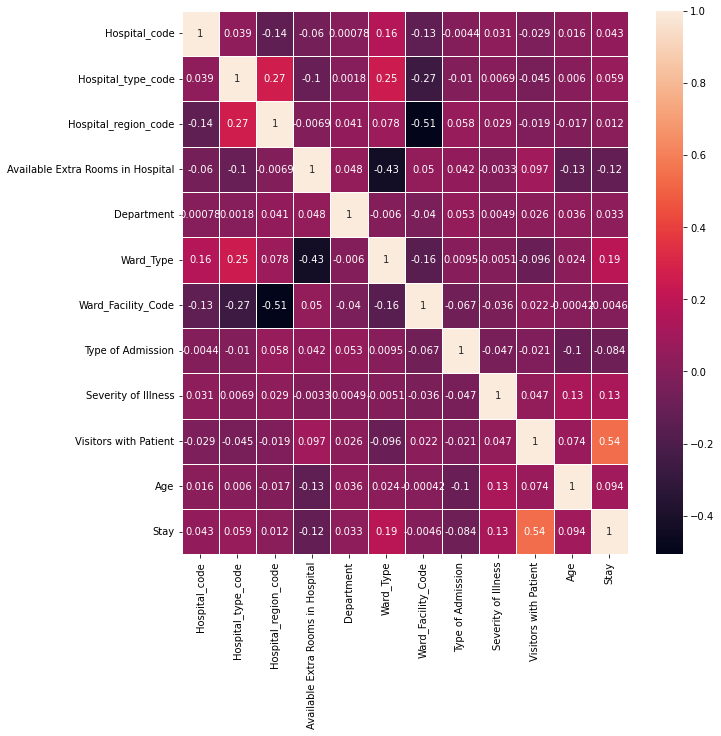

In [37]:
# Heatmap
fig, ax = plt.subplots(figsize=(10,10))        
sns.heatmap(health_care.corr(), annot=True, linewidths=.5, ax=ax)

In [38]:
#OLS
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                   Stay   R-squared (uncentered):                   0.754
Model:                            OLS   Adj. R-squared (uncentered):              0.754
Method:                 Least Squares   F-statistic:                          8.876e+04
Date:                Sun, 19 Dec 2021   Prob (F-statistic):                        0.00
Time:                        14:00:41   Log-Likelihood:                     -6.2289e+05
No. Observations:              318438   AIC:                                  1.246e+06
Df Residuals:                  318427   BIC:                                  1.246e+06
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                                        coef    std err          t      P>|t|      [0.025      0.975]
------------------

In [39]:
#VIF
X_VIF = health_care
data = pd.DataFrame()
data["feature"] = X_VIF.columns
data["VIF"] = [variance_inflation_factor(X_VIF.values, i) for i in range(len(X_VIF.columns))]
print(data)

                              feature        VIF
0                       Hospital_code   5.557224
1                  Hospital_type_code   1.933881
2                Hospital_region_code   2.781609
3   Available Extra Rooms in Hospital   8.577968
4                          Department  11.484799
5                           Ward_Type   7.369338
6                  Ward_Facility_Code   5.527592
7                   Type of Admission   6.029047
8                 Severity of Illness   8.711826
9               Visitors with Patient   6.546418
10                                Age   5.639583
11                               Stay   4.066131


In [40]:
#Choosing the number of components
scaler=StandardScaler()
X_scaler = StandardScaler().fit_transform(X)
pca = PCA().fit(X_scaler)

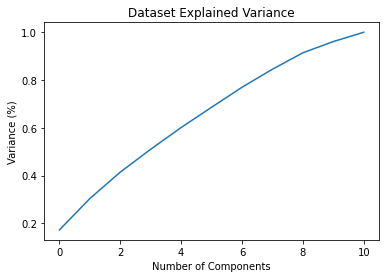

In [41]:
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Dataset Explained Variance')
plt.show()

In [42]:
np.cumsum(pca.explained_variance_ratio_)

array([0.17298781, 0.30416866, 0.4148431 , 0.51060786, 0.60149156,
       0.68618983, 0.76989892, 0.84533686, 0.91412017, 0.96105488,
       1.        ])

In [43]:
# For our analysis we choose n_components = 7
pca = PCA(n_components=7)
X_pca = pca.fit_transform(X_scaler)
X_pca_with_constant = sm.add_constant(X_pca)

In [44]:
model = sm.OLS(y, X_pca_with_constant)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   Stay   R-squared:                       0.310
Model:                            OLS   Adj. R-squared:                  0.310
Method:                 Least Squares   F-statistic:                 2.043e+04
Date:                Sun, 19 Dec 2021   Prob (F-statistic):               0.00
Time:                        14:00:51   Log-Likelihood:            -6.3656e+05
No. Observations:              318438   AIC:                         1.273e+06
Df Residuals:                  318430   BIC:                         1.273e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6986      0.003    852.550      0.0

[Back to top](#Content:)

<a id='part3.4'></a>
### SMOTE analysis
Here we will study imbalance data

<AxesSubplot:>

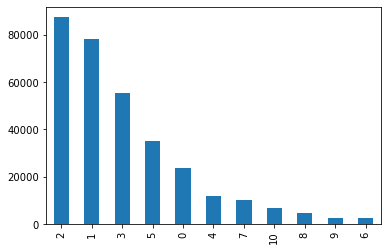

In [45]:
health_care["Stay"].value_counts().plot.bar()

In [46]:
smote_health_care = health_care.copy()

# X = np.array(smote_health_care.loc[:, smote_health_care.columns != "Stay"])
y = np.array(smote_health_care.loc[:, smote_health_care.columns == "Stay"]).reshape(-1, 1)

X = scaler.fit_transform(X_pca_with_constant)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 2, shuffle = True, stratify = y)
oversample = SMOTE(random_state = 33)
X_train_SMOTE, y_train_SMOTE = oversample.fit_resample(X_train, y_train)

<AxesSubplot:>

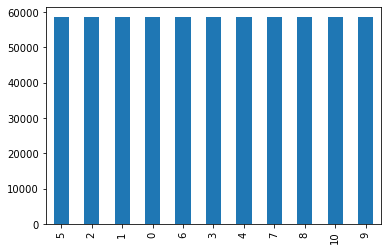

In [48]:
# observe that data has been balanced
pd.Series(y_train_SMOTE).value_counts().plot.bar()

[Back to top](#Content:)


<a id='part4/1'></a>

## Part - 4 Models 

[Back to top](#Content:)

<a id='part4.1.1'></a>
### Score method

In [102]:
# Score of 1 is perfect. The closer the score to 1 the better
K = 10 # Num of Classes - 1 here

# Classes can be ranked here from 0-10
def score(pred, target):
    error = (np.mean(np.abs(pred-target)))/K
    score = 1 - error
    return score

[Back to top](#Content:)

<a id='part4.1.2'></a>
### KNN

In [50]:
# Splitting dataset
y = health_care["Stay"]
X_train, X_test, y_train, y_test = train_test_split(X_pca_with_constant, y, test_size = 0.33, random_state = 2, shuffle = True, stratify = y)

In [51]:
knn = KNeighborsClassifier(n_neighbors=3) 
knn.fit(X_train, y_train) 

KNeighborsClassifier(n_neighbors=3)

In [52]:
y_pred = knn.predict(X_test)

In [53]:
#accuracy
print('Accuracy: %.2f' %accuracy_score(y_test,y_pred))
print(f'Score : %.2f' % score(y_test.ravel(), y_pred.ravel()))

Accuracy: 0.30
Score : 0.86


In [54]:
# Model Precision
print("Precision:",precision_score(y_test, y_pred, average='micro'))
# Model Recall
print("Recall:",recall_score(y_test, y_pred, average='micro'))

Precision: 0.2961697673312081
Recall: 0.2961697673312081


In [55]:
# calling classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.14      0.26      0.18      7789
           1       0.30      0.41      0.35     25786
           2       0.37      0.36      0.37     28872
           3       0.26      0.20      0.23     18203
           4       0.05      0.01      0.02      3875
           5       0.35      0.27      0.31     11556
           6       0.07      0.01      0.01       906
           7       0.18      0.07      0.10      3384
           8       0.28      0.13      0.17      1597
           9       0.15      0.03      0.05       912
          10       0.53      0.30      0.38      2205

    accuracy                           0.30    105085
   macro avg       0.24      0.19      0.20    105085
weighted avg       0.30      0.30      0.29    105085



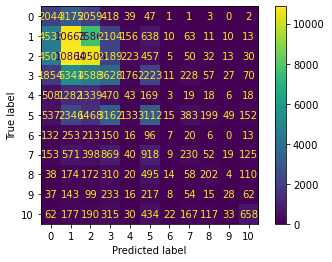

In [56]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm )
disp.plot()
plt.show();

[Back to top](#Content:)

<a id='part4.1.3'></a>
### Decision Trees

In [57]:
tree = DecisionTreeClassifier(criterion='entropy')
tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [58]:
y_pred = tree.predict(X_test)
print(f'Accuracy : %.3f' % accuracy_score(y_test, y_pred))
print(f'Score : %.2f' % score(y_test.ravel(), y_pred.ravel()))

Accuracy : 0.328
Score : 0.86


In [59]:
# Model Precision
print("Precision:",precision_score(y_test, y_pred, average='micro'))

# Model Recall
print("Recall:",recall_score(y_test, y_pred, average='micro'))

Precision: 0.32764904601037254
Recall: 0.32764904601037254


In [60]:
# calling classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.16      0.15      0.16      7789
           1       0.34      0.41      0.37     25786
           2       0.39      0.48      0.43     28872
           3       0.28      0.21      0.24     18203
           4       0.06      0.02      0.03      3875
           5       0.35      0.32      0.34     11556
           6       0.04      0.02      0.03       906
           7       0.18      0.11      0.14      3384
           8       0.24      0.18      0.21      1597
           9       0.13      0.08      0.10       912
          10       0.41      0.34      0.37      2205

    accuracy                           0.33    105085
   macro avg       0.24      0.21      0.22    105085
weighted avg       0.31      0.33      0.32    105085



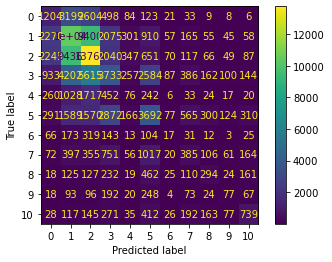

In [61]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm )
disp.plot()
plt.show();

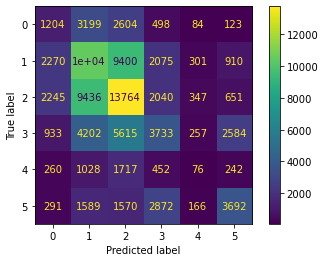

In [62]:
cm_reduced = cm[:6,:6]

cm = confusion_matrix(y_test, y_pred);
disp = ConfusionMatrixDisplay(cm_reduced)
disp.plot();

[Back to top](#Content:)

<a id='part4.1.4'></a>
### Random Forest

In [63]:
forest = RandomForestClassifier(n_estimators=10, criterion='entropy')
forest.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [64]:
y_pred = forest.predict(X_test)
print(f'Accuracy : %.3f' % accuracy_score(y_test, y_pred))
print(f'Score : %.4f' % score(y_test.ravel(), y_pred.ravel()))

Accuracy : 0.338
Score : 0.8688


In [65]:
# Model Precision
print("Precision:",precision_score(y_test, y_pred, average='micro'))

# Model Recall
print("Recall:",recall_score(y_test, y_pred, average='micro'))

Precision: 0.3382595042108769
Recall: 0.3382595042108769


In [66]:
# calling classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.18      0.11      0.13      7789
           1       0.35      0.38      0.37     25786
           2       0.39      0.52      0.44     28872
           3       0.27      0.22      0.25     18203
           4       0.07      0.02      0.03      3875
           5       0.35      0.37      0.36     11556
           6       0.05      0.02      0.02       906
           7       0.20      0.12      0.15      3384
           8       0.26      0.17      0.21      1597
           9       0.14      0.06      0.09       912
          10       0.43      0.38      0.40      2205

    accuracy                           0.34    105085
   macro avg       0.25      0.22      0.22    105085
weighted avg       0.32      0.34      0.32    105085



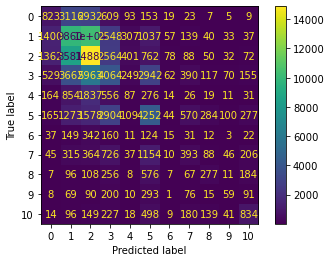

In [67]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

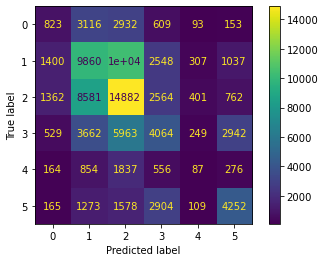

In [68]:
cm_reduced = cm[:6,:6]

cm = confusion_matrix(y_test, y_pred);
disp = ConfusionMatrixDisplay(cm_reduced)
disp.plot();

In [69]:
### Cross Validating to check some results
kf = KFold(5, shuffle=True)
fold = 1

for train_index, validate_index in kf.split(X,y):
    forest.fit(X[train_index], y[train_index])
    ytest = y[validate_index]
    y_pred = forest.predict(X[validate_index])
    print(f'Accuracy : %.4f' % accuracy_score(ytest, y_pred))
    print(f'Score : %.4f' % score(ytest.ravel(), y_pred.ravel()))

Accuracy : 0.3371
Score : 0.8683
Accuracy : 0.3404
Score : 0.8702
Accuracy : 0.3383
Score : 0.8698
Accuracy : 0.3366
Score : 0.8690
Accuracy : 0.3401
Score : 0.8698


In [70]:
#Trying Different num of estimators
accuracy_data = []
score_data = []

for i in range(1,2):
    forest = RandomForestClassifier(n_estimators=i, criterion='entropy')
    forest.fit(X_train, y_train)
    y_pred = forest.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    score = 1-np.mean(np.abs(y_test-y_pred))/K
    print(f'Accuracy {i} estimators : %.4f' % accuracy)
    print(f'Score {i} estimators : %.4f' % score)
    accuracy_data.append(accuracy)
    score_data.append(score)

Accuracy 1 estimators : 0.3071
Score 1 estimators : 0.8556


In [71]:
# nums = np.arange(1,40)
# fig = plt.figure(figsize=(6,5))
# plt.plot(nums, accuracy_data, c='r', label='Accuracy')
# plt.plot(nums, score_data, label='Score')
# plt.xlabel('Number of Trees')
# plt.ylabel('Accuracy and Score')
# plt.legend(loc='upper right')
# plt.show();

In [72]:
#Last Model results
y_pred = forest.predict(X_test)
print(f'Accuracy : %.3f' % accuracy_score(y_test, y_pred))
score = 1-np.mean(np.abs(y_test-y_pred))/K
print(f'Score : %.4f' % score)

Accuracy : 0.307
Score : 0.8556


In [73]:
# Model Precision
print("Precision:",precision_score(y_test, y_pred, average='micro'))

# Model Recall
print("Recall:",recall_score(y_test, y_pred, average='micro'))

Precision: 0.3070752248180045
Recall: 0.3070752248180045


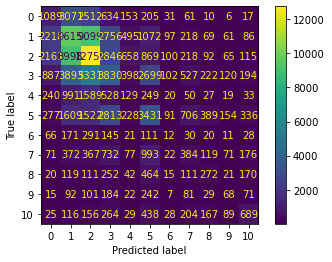

In [74]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

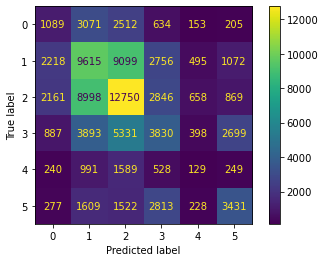

In [75]:
cm_reduced = cm[:6,:6]

cm = confusion_matrix(y_test, y_pred);
disp = ConfusionMatrixDisplay(cm_reduced)
disp.plot();

[Back to top](#Content:)


<a id='part4.1.5'></a>
### Naive Bayes

In [95]:
smoothing = [1e-3, 1e-2, 1e-1, 1, 10,100]
for i in range(len(smoothing)):
    model = GaussianNB(var_smoothing=smoothing[i])
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('var_smoothing = ',smoothing[i] )
    print(f'Accuracy : %.3f' % accuracy_score(y_test, y_pred))
    score = 1-(np.mean(np.abs(y_test.ravel()-y_pred.ravel())))/K
    print(f'Score : %.4f' % score)
    print('---------' )

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


var_smoothing =  0.001
Accuracy : 0.336
Score : 0.8691
---------


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


var_smoothing =  0.01
Accuracy : 0.336
Score : 0.8691
---------


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


var_smoothing =  0.1
Accuracy : 0.334
Score : 0.8686
---------


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


var_smoothing =  1
Accuracy : 0.306
Score : 0.8595
---------


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


var_smoothing =  10
Accuracy : 0.275
Score : 0.8517
---------


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


var_smoothing =  100
Accuracy : 0.275
Score : 0.8514
---------


In [96]:
## Keeping smoothing = 1
model = GaussianNB(var_smoothing=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [97]:
print(f'Accuracy : %.3f' % accuracy_score(y_test, y_pred))
print(f'Score : %.4f' % score)
# Model Precision
print("Precision:",precision_score(y_test, y_pred, average='micro'))

# Model Recall
print("Recall:",recall_score(y_test, y_pred, average='micro'))

Accuracy : 0.306
Score : 0.8514
Precision: 0.305685873340629
Recall: 0.305685873340629


In [98]:
# calling classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      7789
           1       0.29      0.24      0.26     25786
           2       0.31      0.83      0.45     28872
           3       0.27      0.03      0.06     18203
           4       0.00      0.00      0.00      3875
           5       0.27      0.07      0.12     11556
           6       0.00      0.00      0.00       906
           7       0.00      0.00      0.00      3384
           8       0.00      0.00      0.00      1597
           9       0.00      0.00      0.00       912
          10       0.57      0.23      0.33      2205

    accuracy                           0.31    105085
   macro avg       0.15      0.13      0.11    105085
weighted avg       0.24      0.31      0.22    105085



C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


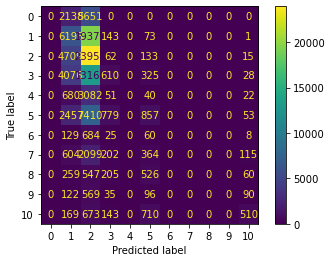

In [99]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

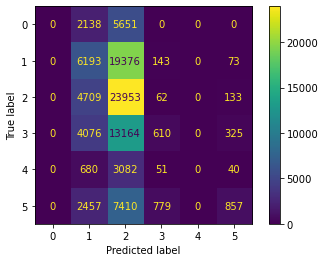

In [100]:
cm_reduced = cm[:6,:6]

cm = confusion_matrix(y_test, y_pred);
disp = ConfusionMatrixDisplay(cm_reduced)
disp.plot();

[Back to top](#Content:)

<a id='part4.1.6'></a>
### ANN

In [82]:
nn = Sequential()

#model.add(Dropout(0.1)) #applies to layer before ie input here
nn.add(Dense(12, input_dim=X.shape[1], activation='relu'))
nn.add(Dense(8, activation='relu'))
nn.add(Dense(1, activation='sigmoid'))
nn.add(Dropout(0.2))
nn.add(Dense(1))

In [83]:
nn.compile(loss='mean_squared_error', optimizer='adam')
monitor = EarlyStopping(monitor='loss', min_delta=1e-4, patience=5, verbose=1, mode='auto')
nn.fit(X_train,y_train,verbose=2,epochs=20)
pred = nn.predict(X_test)
#accuracy
print('Accuracy: %.2f' %accuracy_score(y_test,y_pred))
print(f'Score : %.4f' % score)

Epoch 1/20
6668/6668 - 9s - loss: 5.6993 - 9s/epoch - 1ms/step
Epoch 2/20
6668/6668 - 8s - loss: 3.9344 - 8s/epoch - 1ms/step
Epoch 3/20
6668/6668 - 8s - loss: 3.8776 - 8s/epoch - 1ms/step
Epoch 4/20
6668/6668 - 8s - loss: 3.8536 - 8s/epoch - 1ms/step
Epoch 5/20
6668/6668 - 8s - loss: 3.8442 - 8s/epoch - 1ms/step
Epoch 6/20
6668/6668 - 8s - loss: 3.8310 - 8s/epoch - 1ms/step
Epoch 7/20
6668/6668 - 8s - loss: 3.8254 - 8s/epoch - 1ms/step
Epoch 8/20
6668/6668 - 8s - loss: 3.8281 - 8s/epoch - 1ms/step
Epoch 9/20
6668/6668 - 8s - loss: 3.8166 - 8s/epoch - 1ms/step
Epoch 10/20
6668/6668 - 8s - loss: 3.8209 - 8s/epoch - 1ms/step
Epoch 11/20
6668/6668 - 8s - loss: 3.8178 - 8s/epoch - 1ms/step
Epoch 12/20
6668/6668 - 8s - loss: 3.8143 - 8s/epoch - 1ms/step
Epoch 13/20
6668/6668 - 8s - loss: 3.8068 - 8s/epoch - 1ms/step
Epoch 14/20
6668/6668 - 8s - loss: 3.8054 - 8s/epoch - 1ms/step
Epoch 15/20
6668/6668 - 8s - loss: 3.8039 - 8s/epoch - 1ms/step
Epoch 16/20
6668/6668 - 8s - loss: 3.8073 - 8s/ep

In [84]:
# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print("Final score (RMSE): {}".format(score))
nn.summary()

Final score (RMSE): 1.8467335496440245
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                108       
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
 dropout (Dropout)           (None, 1)                 0         
                                                                 
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
Total params: 223
Trainable params: 223
Non-trainable params: 0
_________________________________________________________________


In [85]:
# # compile the keras model
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# # fit the keras model on the dataset
# model.fit(X, y, epochs=150, batch_size=10)
# # evaluate the keras model
# accuracy = model.evaluate(X, y)
# print('Accuracy: %.2f' % (accuracy*100))

In [86]:
# Model Precision
print("Precision:",precision_score(y_test, y_pred, average='micro'))

# Model Recall
print("Recall:",recall_score(y_test, y_pred, average='micro'))

Precision: 0.2920873578531665
Recall: 0.2920873578531665


In [87]:
#calling classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      7789
           1       0.28      0.18      0.22     25786
           2       0.29      0.88      0.44     28872
           3       0.12      0.00      0.01     18203
           4       0.00      0.00      0.00      3875
           5       0.16      0.02      0.03     11556
           6       0.00      0.00      0.00       906
           7       0.00      0.00      0.00      3384
           8       0.00      0.00      0.00      1597
           9       0.00      0.00      0.00       912
          10       0.60      0.18      0.28      2205

    accuracy                           0.29    105085
   macro avg       0.13      0.11      0.09    105085
weighted avg       0.20      0.29      0.19    105085



C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


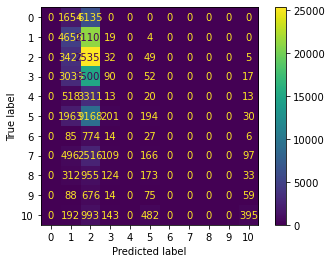

In [88]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm )
disp.plot()
plt.show();

[Back to top](#Content:)

<a id='part4/2'></a>
### Application of models with SMOTE
Here we are applying SMOTE for imbalanced data.


We are reintroducing smote again and splitting our balanced data, so that our program does not pick X_test from the original data.

In [ ]:
smote_health_care = health_care.copy()
# X = np.array(smote_health_care.loc[:, smote_health_care.columns != "Stay"])
y = np.array(smote_health_care.loc[:, smote_health_care.columns == "Stay"]).reshape(-1, 1)

X = scaler.fit_transform(X_pca_with_constant)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 2, shuffle = True, stratify = y)
oversample = SMOTE(random_state = 33)
X_train_SMOTE, y_train_SMOTE = oversample.fit_resample(X_train, y_train)

[Back to top](#Content:)

<a id='part4.2.1'></a>
### KNN with SMOTE

In [90]:
#with Smote
knn = KNeighborsClassifier(n_neighbors=3) 
knn.fit(X_train_SMOTE, y_train_SMOTE) 

KNeighborsClassifier(n_neighbors=3)

In [91]:
y_pred = knn.predict(X_test)

In [103]:
#accuracy
print('Accuracy: %.2f' %accuracy_score(y_test,y_pred))
#score
print(f'Score : %.2f' % score(y_test.ravel(), y_pred.ravel()))

Accuracy: 0.31
Score : 0.86


In [104]:
# Model Precision
print("Precision:",precision_score(y_test, y_pred, average='micro'))
# Model Recall
print("Recall:",recall_score(y_test, y_pred, average='micro'))

Precision: 0.305685873340629
Recall: 0.305685873340629


In [105]:
# calling classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      7789
           1       0.29      0.24      0.26     25786
           2       0.31      0.83      0.45     28872
           3       0.27      0.03      0.06     18203
           4       0.00      0.00      0.00      3875
           5       0.27      0.07      0.12     11556
           6       0.00      0.00      0.00       906
           7       0.00      0.00      0.00      3384
           8       0.00      0.00      0.00      1597
           9       0.00      0.00      0.00       912
          10       0.57      0.23      0.33      2205

    accuracy                           0.31    105085
   macro avg       0.15      0.13      0.11    105085
weighted avg       0.24      0.31      0.22    105085



C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


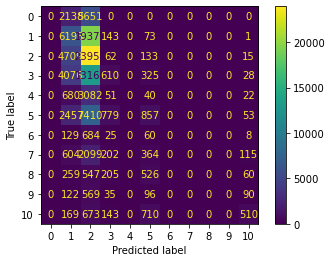

In [106]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm )
disp.plot()
plt.show();

[Back to top](#Content:)

<a id='part4.2.2'></a>
### Decision Tree with SMOTE

In [107]:
#with SMOTE
tree.fit(X_train_SMOTE, y_train_SMOTE)

DecisionTreeClassifier(criterion='entropy')

In [108]:
y_pred = tree.predict(X_test)

In [109]:
#Accuracy score
print(f'Accuracy : %.3f' % accuracy_score(y_test, y_pred))
print(f'Score : %.4f' % score(y_test.ravel(), y_pred.ravel()))
# Model Precision
print("Precision:",precision_score(y_test, y_pred, average='micro'))
# Model Recall
print("Recall:",recall_score(y_test, y_pred, average='micro'))

Accuracy : 0.286
Score : 0.8427
Precision: 0.2855402769186849
Recall: 0.2855402769186849


In [110]:
# calling classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.16      0.26      0.20      7789
           1       0.34      0.34      0.34     25786
           2       0.39      0.36      0.37     28872
           3       0.27      0.19      0.22     18203
           4       0.07      0.10      0.08      3875
           5       0.33      0.28      0.30     11556
           6       0.02      0.04      0.03       906
           7       0.14      0.16      0.15      3384
           8       0.17      0.22      0.19      1597
           9       0.07      0.11      0.08       912
          10       0.31      0.36      0.33      2205

    accuracy                           0.29    105085
   macro avg       0.21      0.22      0.21    105085
weighted avg       0.30      0.29      0.29    105085



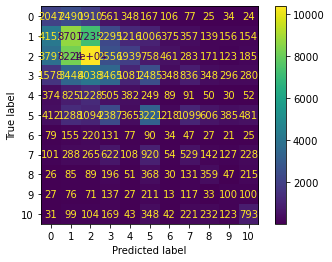

In [111]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm )
disp.plot()
plt.show();

[Back to top](#Content:)

<a id='part4.2.3'></a>
### Random Forest with SMOTE

In [112]:
forest = RandomForestClassifier(n_estimators=10, criterion='entropy')
forest.fit(X_train_SMOTE, y_train_SMOTE)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [113]:
y_pred = forest.predict(X_test)

In [114]:
#Accuracy score
print(f'Accuracy : %.3f' % accuracy_score(y_test, y_pred))
print(f'Score : %.4f' % score(y_test.ravel(), y_pred.ravel()))
# Model Precision
print("Precision:",precision_score(y_test, y_pred, average='micro'))
# Model Recall
print("Recall:",recall_score(y_test, y_pred, average='micro'))

Accuracy : 0.290
Score : 0.8462
Precision: 0.29001284674311273
Recall: 0.29001284674311273


In [115]:
# calling classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.17      0.25      0.20      7789
           1       0.35      0.30      0.32     25786
           2       0.39      0.38      0.39     28872
           3       0.26      0.20      0.23     18203
           4       0.07      0.11      0.08      3875
           5       0.33      0.31      0.32     11556
           6       0.02      0.04      0.03       906
           7       0.15      0.18      0.16      3384
           8       0.19      0.26      0.22      1597
           9       0.08      0.11      0.09       912
          10       0.34      0.41      0.37      2205

    accuracy                           0.29    105085
   macro avg       0.21      0.23      0.22    105085
weighted avg       0.31      0.29      0.30    105085



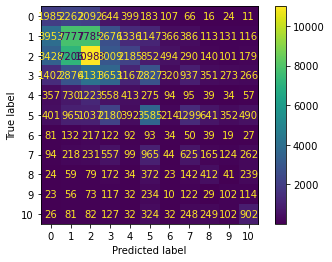

In [116]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm )
disp.plot()
plt.show();

[Back to top](#Content:)

<a id='part4.2.4'></a>
### Naive Bayes with SMOTE

In [117]:
## Keeping smoothing = 1
model = GaussianNB(var_smoothing=1)
model.fit(X_train_SMOTE, y_train_SMOTE)
y_pred = model.predict(X_test)

In [118]:
#Accuracy score
print(f'Accuracy : %.3f' % accuracy_score(y_test, y_pred))
print(f'Score : %.4f' % score(y_test.ravel(), y_pred.ravel()))
# Model Precision
print("Precision:",precision_score(y_test, y_pred, average='micro'))
# Model Recall
print("Recall:",recall_score(y_test, y_pred, average='micro'))

Accuracy : 0.193
Score : 0.7961
Precision: 0.19288195270495315
Recall: 0.19288195270495315


In [119]:
# calling classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.13      0.60      0.22      7789
           1       0.37      0.13      0.19     25786
           2       0.42      0.24      0.31     28872
           3       0.26      0.01      0.03     18203
           4       0.05      0.13      0.07      3875
           5       0.30      0.24      0.27     11556
           6       0.01      0.20      0.02       906
           7       0.10      0.01      0.01      3384
           8       0.12      0.58      0.19      1597
           9       0.04      0.04      0.04       912
          10       0.49      0.27      0.34      2205

    accuracy                           0.19    105085
   macro avg       0.21      0.22      0.15    105085
weighted avg       0.31      0.19      0.20    105085



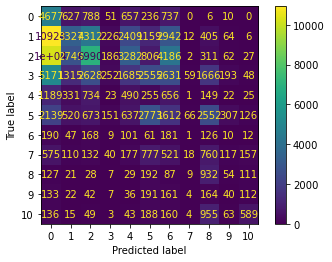

In [120]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm )
disp.plot()
plt.show();

[Back to top](#Content:)

<a id='part4.2.5'></a>
### ANN with SMOTE

In [121]:
nn = Sequential()

#model.add(Dropout(0.1)) #applies to layer before ie input here
nn.add(Dense(12, input_dim=X.shape[1], activation='relu'))
nn.add(Dense(8, activation='relu'))
nn.add(Dense(1, activation='sigmoid'))
nn.add(Dropout(0.2))
nn.add(Dense(1))

In [122]:
nn.compile(loss='mean_squared_error', optimizer='adam')
monitor = EarlyStopping(monitor='loss', min_delta=1e-4, patience=5, verbose=1, mode='auto')

In [123]:
nn.fit(X_train_SMOTE,y_train_SMOTE,verbose=1,epochs=20)
pred = nn.predict(X_test)

Epoch 1/20
20151/20151 [==============================] - 33s 2ms/step - loss: 10.7117
Epoch 2/20
20151/20151 [==============================] - 34s 2ms/step - loss: 7.1456
Epoch 3/20
20151/20151 [==============================] - 34s 2ms/step - loss: 7.0941
Epoch 4/20
20151/20151 [==============================] - 33s 2ms/step - loss: 7.0924
Epoch 5/20
20151/20151 [==============================] - 30s 1ms/step - loss: 7.0741
Epoch 6/20
20151/20151 [==============================] - 30s 1ms/step - loss: 7.0648
Epoch 7/20
20151/20151 [==============================] - 30s 1ms/step - loss: 7.0442
Epoch 8/20
20151/20151 [==============================] - 30s 1ms/step - loss: 7.0584
Epoch 9/20
20151/20151 [==============================] - 32s 2ms/step - loss: 7.0672
Epoch 10/20
20151/20151 [==============================] - 33s 2ms/step - loss: 7.0587
Epoch 11/20
20151/20151 [==============================] - 36s 2ms/step - loss: 7.0590: 0
Epoch 12/20
20151/20151 [=======================

In [124]:
#Accuracy score
print(f'Accuracy : %.3f' % accuracy_score(y_test, y_pred))
print(f'Score : %.4f' % score(y_test.ravel(), y_pred.ravel()))
# Model Precision
print("Precision:",precision_score(y_test, y_pred, average='micro'))
# Model Recall
print("Recall:",recall_score(y_test, y_pred, average='micro'))

Accuracy : 0.193
Score : 0.7961
Precision: 0.19288195270495315
Recall: 0.19288195270495315


In [125]:
# calling classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.13      0.60      0.22      7789
           1       0.37      0.13      0.19     25786
           2       0.42      0.24      0.31     28872
           3       0.26      0.01      0.03     18203
           4       0.05      0.13      0.07      3875
           5       0.30      0.24      0.27     11556
           6       0.01      0.20      0.02       906
           7       0.10      0.01      0.01      3384
           8       0.12      0.58      0.19      1597
           9       0.04      0.04      0.04       912
          10       0.49      0.27      0.34      2205

    accuracy                           0.19    105085
   macro avg       0.21      0.22      0.15    105085
weighted avg       0.31      0.19      0.20    105085



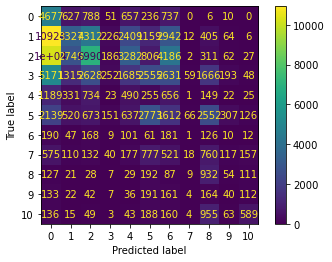

In [126]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm )
disp.plot()
plt.show();

[Back to top](#Content:)


<a id='part5'></a>

## Part - 5 Additional Models

[Back to top](#Content:)


<a id='part5.1'></a>
### Gradient Boost Classifier

In [127]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GradientBoostingClassifier()

In [129]:
y_pred = model.predict(X_test)
print(f'Accuracy : %.3f' % accuracy_score(y_test, y_pred))
print(f'Score : %.4f' % score(y_test.ravel(), y_pred.ravel()))

Accuracy : 0.365
Score : 0.8791


In [130]:
# Model Precision
print("Precision:",precision_score(y_test, y_pred, average='micro'))

# Model Recall
print("Recall:",recall_score(y_test, y_pred, average='micro'))

Precision: 0.3645620212209164
Recall: 0.3645620212209164


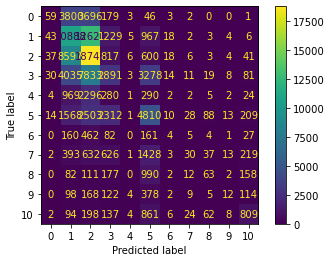

In [131]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

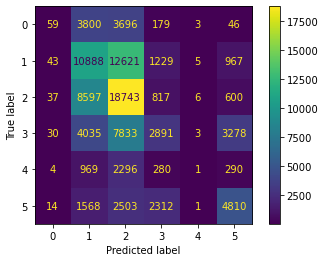

In [132]:
cm_reduced = cm[:6,:6]

cm = confusion_matrix(y_test, y_pred);
disp = ConfusionMatrixDisplay(cm_reduced)
disp.plot();

[Back to top](#Content:)


<a id='part5.2'></a>
### Cat Boost Classifier

In [133]:
from catboost import CatBoostClassifier
cb = CatBoostClassifier(iterations=1000)
cb.fit(X_train, y_train)

Learning rate set to 0.104018
0:	learn: 2.2569225	total: 538ms	remaining: 8m 57s
1:	learn: 2.1580242	total: 905ms	remaining: 7m 31s
2:	learn: 2.0817779	total: 1.26s	remaining: 6m 58s
3:	learn: 2.0216644	total: 1.61s	remaining: 6m 40s
4:	learn: 1.9743844	total: 1.98s	remaining: 6m 33s
5:	learn: 1.9340015	total: 2.36s	remaining: 6m 31s
6:	learn: 1.9008227	total: 2.79s	remaining: 6m 35s
7:	learn: 1.8729384	total: 3.17s	remaining: 6m 33s
8:	learn: 1.8494418	total: 3.54s	remaining: 6m 29s
9:	learn: 1.8282836	total: 3.91s	remaining: 6m 27s
10:	learn: 1.8106169	total: 4.31s	remaining: 6m 27s
11:	learn: 1.7956633	total: 4.67s	remaining: 6m 24s
12:	learn: 1.7823565	total: 5.04s	remaining: 6m 22s
13:	learn: 1.7703267	total: 5.42s	remaining: 6m 21s
14:	learn: 1.7602857	total: 5.78s	remaining: 6m 19s
15:	learn: 1.7514935	total: 6.15s	remaining: 6m 18s
16:	learn: 1.7428241	total: 6.52s	remaining: 6m 16s
17:	learn: 1.7354377	total: 6.87s	remaining: 6m 14s
18:	learn: 1.7289446	total: 7.22s	remaining:

158:	learn: 1.6193776	total: 1m 5s	remaining: 5m 45s
159:	learn: 1.6189415	total: 1m 5s	remaining: 5m 44s
160:	learn: 1.6187287	total: 1m 6s	remaining: 5m 44s
161:	learn: 1.6185095	total: 1m 6s	remaining: 5m 44s
162:	learn: 1.6182962	total: 1m 6s	remaining: 5m 43s
163:	learn: 1.6179891	total: 1m 7s	remaining: 5m 42s
164:	learn: 1.6177203	total: 1m 7s	remaining: 5m 42s
165:	learn: 1.6174492	total: 1m 8s	remaining: 5m 41s
166:	learn: 1.6169907	total: 1m 8s	remaining: 5m 41s
167:	learn: 1.6167232	total: 1m 8s	remaining: 5m 40s
168:	learn: 1.6165170	total: 1m 9s	remaining: 5m 39s
169:	learn: 1.6161987	total: 1m 9s	remaining: 5m 39s
170:	learn: 1.6159865	total: 1m 9s	remaining: 5m 38s
171:	learn: 1.6158265	total: 1m 10s	remaining: 5m 37s
172:	learn: 1.6154761	total: 1m 10s	remaining: 5m 37s
173:	learn: 1.6152766	total: 1m 10s	remaining: 5m 36s
174:	learn: 1.6150846	total: 1m 11s	remaining: 5m 36s
175:	learn: 1.6147047	total: 1m 12s	remaining: 5m 37s
176:	learn: 1.6145659	total: 1m 12s	remai

311:	learn: 1.5866004	total: 2m 4s	remaining: 4m 33s
312:	learn: 1.5864295	total: 2m 4s	remaining: 4m 33s
313:	learn: 1.5863069	total: 2m 4s	remaining: 4m 32s
314:	learn: 1.5862040	total: 2m 5s	remaining: 4m 32s
315:	learn: 1.5860849	total: 2m 5s	remaining: 4m 31s
316:	learn: 1.5859025	total: 2m 6s	remaining: 4m 31s
317:	learn: 1.5856779	total: 2m 6s	remaining: 4m 31s
318:	learn: 1.5855520	total: 2m 6s	remaining: 4m 30s
319:	learn: 1.5854111	total: 2m 7s	remaining: 4m 30s
320:	learn: 1.5852259	total: 2m 7s	remaining: 4m 30s
321:	learn: 1.5850861	total: 2m 8s	remaining: 4m 29s
322:	learn: 1.5849869	total: 2m 8s	remaining: 4m 29s
323:	learn: 1.5848656	total: 2m 8s	remaining: 4m 29s
324:	learn: 1.5847022	total: 2m 9s	remaining: 4m 28s
325:	learn: 1.5845179	total: 2m 9s	remaining: 4m 28s
326:	learn: 1.5842966	total: 2m 10s	remaining: 4m 28s
327:	learn: 1.5841426	total: 2m 10s	remaining: 4m 27s
328:	learn: 1.5840282	total: 2m 11s	remaining: 4m 27s
329:	learn: 1.5838620	total: 2m 11s	remaini

464:	learn: 1.5652207	total: 3m 1s	remaining: 3m 29s
465:	learn: 1.5650820	total: 3m 2s	remaining: 3m 28s
466:	learn: 1.5649780	total: 3m 2s	remaining: 3m 28s
467:	learn: 1.5648765	total: 3m 2s	remaining: 3m 27s
468:	learn: 1.5647820	total: 3m 3s	remaining: 3m 27s
469:	learn: 1.5646634	total: 3m 3s	remaining: 3m 27s
470:	learn: 1.5644889	total: 3m 3s	remaining: 3m 26s
471:	learn: 1.5643960	total: 3m 4s	remaining: 3m 26s
472:	learn: 1.5642082	total: 3m 4s	remaining: 3m 25s
473:	learn: 1.5640991	total: 3m 5s	remaining: 3m 25s
474:	learn: 1.5639592	total: 3m 5s	remaining: 3m 24s
475:	learn: 1.5638405	total: 3m 5s	remaining: 3m 24s
476:	learn: 1.5636976	total: 3m 6s	remaining: 3m 24s
477:	learn: 1.5635648	total: 3m 6s	remaining: 3m 23s
478:	learn: 1.5634121	total: 3m 6s	remaining: 3m 23s
479:	learn: 1.5631680	total: 3m 7s	remaining: 3m 22s
480:	learn: 1.5630697	total: 3m 7s	remaining: 3m 22s
481:	learn: 1.5629856	total: 3m 7s	remaining: 3m 21s
482:	learn: 1.5628508	total: 3m 8s	remaining: 

617:	learn: 1.5473296	total: 4m 1s	remaining: 2m 28s
618:	learn: 1.5471998	total: 4m 1s	remaining: 2m 28s
619:	learn: 1.5471181	total: 4m 1s	remaining: 2m 28s
620:	learn: 1.5470053	total: 4m 2s	remaining: 2m 27s
621:	learn: 1.5469191	total: 4m 2s	remaining: 2m 27s
622:	learn: 1.5468498	total: 4m 2s	remaining: 2m 26s
623:	learn: 1.5467643	total: 4m 3s	remaining: 2m 26s
624:	learn: 1.5466485	total: 4m 3s	remaining: 2m 26s
625:	learn: 1.5464906	total: 4m 3s	remaining: 2m 25s
626:	learn: 1.5463654	total: 4m 4s	remaining: 2m 25s
627:	learn: 1.5461374	total: 4m 4s	remaining: 2m 24s
628:	learn: 1.5459612	total: 4m 4s	remaining: 2m 24s
629:	learn: 1.5458561	total: 4m 5s	remaining: 2m 24s
630:	learn: 1.5457459	total: 4m 5s	remaining: 2m 23s
631:	learn: 1.5455546	total: 4m 5s	remaining: 2m 23s
632:	learn: 1.5454715	total: 4m 6s	remaining: 2m 22s
633:	learn: 1.5452977	total: 4m 6s	remaining: 2m 22s
634:	learn: 1.5451922	total: 4m 7s	remaining: 2m 21s
635:	learn: 1.5450427	total: 4m 7s	remaining: 

770:	learn: 1.5318380	total: 4m 57s	remaining: 1m 28s
771:	learn: 1.5317788	total: 4m 58s	remaining: 1m 28s
772:	learn: 1.5317056	total: 4m 58s	remaining: 1m 27s
773:	learn: 1.5315919	total: 4m 58s	remaining: 1m 27s
774:	learn: 1.5315138	total: 4m 59s	remaining: 1m 26s
775:	learn: 1.5314125	total: 4m 59s	remaining: 1m 26s
776:	learn: 1.5313195	total: 4m 59s	remaining: 1m 26s
777:	learn: 1.5312413	total: 5m	remaining: 1m 25s
778:	learn: 1.5311749	total: 5m	remaining: 1m 25s
779:	learn: 1.5310872	total: 5m 1s	remaining: 1m 24s
780:	learn: 1.5309925	total: 5m 1s	remaining: 1m 24s
781:	learn: 1.5309101	total: 5m 1s	remaining: 1m 24s
782:	learn: 1.5308433	total: 5m 2s	remaining: 1m 23s
783:	learn: 1.5307259	total: 5m 2s	remaining: 1m 23s
784:	learn: 1.5306503	total: 5m 2s	remaining: 1m 22s
785:	learn: 1.5305408	total: 5m 3s	remaining: 1m 22s
786:	learn: 1.5304904	total: 5m 3s	remaining: 1m 22s
787:	learn: 1.5303957	total: 5m 4s	remaining: 1m 21s
788:	learn: 1.5303186	total: 5m 4s	remaining:

925:	learn: 1.5181925	total: 5m 55s	remaining: 28.4s
926:	learn: 1.5181116	total: 5m 55s	remaining: 28s
927:	learn: 1.5179984	total: 5m 55s	remaining: 27.6s
928:	learn: 1.5179193	total: 5m 56s	remaining: 27.2s
929:	learn: 1.5178658	total: 5m 56s	remaining: 26.8s
930:	learn: 1.5177985	total: 5m 56s	remaining: 26.4s
931:	learn: 1.5177178	total: 5m 57s	remaining: 26.1s
932:	learn: 1.5176067	total: 5m 57s	remaining: 25.7s
933:	learn: 1.5175039	total: 5m 57s	remaining: 25.3s
934:	learn: 1.5174076	total: 5m 58s	remaining: 24.9s
935:	learn: 1.5173455	total: 5m 58s	remaining: 24.5s
936:	learn: 1.5171790	total: 5m 58s	remaining: 24.1s
937:	learn: 1.5170862	total: 5m 59s	remaining: 23.8s
938:	learn: 1.5170101	total: 5m 59s	remaining: 23.4s
939:	learn: 1.5169474	total: 6m	remaining: 23s
940:	learn: 1.5168559	total: 6m	remaining: 22.6s
941:	learn: 1.5167844	total: 6m	remaining: 22.2s
942:	learn: 1.5166767	total: 6m 1s	remaining: 21.8s
943:	learn: 1.5165790	total: 6m 1s	remaining: 21.4s
944:	learn:

In [134]:
y_pred = cb.predict(X_test)
print(f'Accuracy : %.3f' % accuracy_score(y_test, y_pred))

Accuracy : 0.380


In [135]:
y_pred = y_pred.flatten()
y_pred.shape

(105085,)

In [137]:
y_diff = np.abs(y_test.ravel()-y_pred.ravel())

In [138]:
print(f'Score : %.4f' % score(y_test.ravel(), y_pred.ravel()))

Score : 0.8847


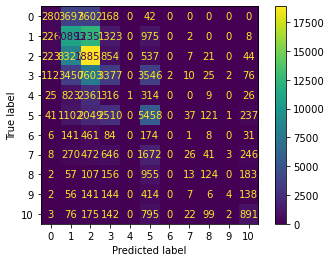

In [139]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

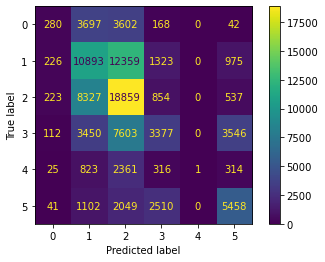

In [140]:
cm_reduced = cm[:6,:6]

cm = confusion_matrix(y_test, y_pred);
disp = ConfusionMatrixDisplay(cm_reduced)
disp.plot();

[Back to top](#Content:)


<a id='part5.3'></a>
### XGB BOOST Classifier

In [141]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

C:\Users\LENOVO\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[15:05:30] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [143]:
y_pred = xgb.predict(X_test)
print(f'Accuracy : %.3f' % accuracy_score(y_test, y_pred))
score = 1-np.mean(np.abs(y_test.ravel()-y_pred.ravel()))/K
print(f'Score : %.4f' % score)

Accuracy : 0.374
Score : 0.8825


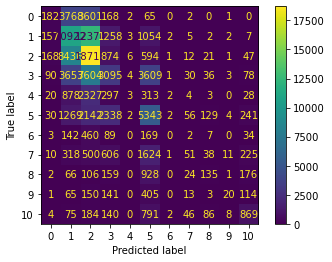

In [144]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()